In [3]:
import pandas as pd

From [QuantEcon](https://python-programming.quantecon.org/pandas.html#dataframes)

In [36]:
url = 'https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv'
df = pd.read_csv(url)

type(df)
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


There are a variety of ways to filter dataframes.

In [12]:
df[df.POP >= 20000]

,country isocode,year,POP,XRAT,tcgdp,cc,cg
country,,,,,,,
Argentina,ARG,2000,37335.653,0.99950,2.950722e+05,75.716805,5.578804
India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546
United States,USA,2000,282171.957,1.00000,9.898700e+06,72.347054,6.032454


In [13]:
df[df["POP"] >= 20000]

,country isocode,year,POP,XRAT,tcgdp,cc,cg
country,,,,,,,
Argentina,ARG,2000,37335.653,0.99950,2.950722e+05,75.716805,5.578804
India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546
United States,USA,2000,282171.957,1.00000,9.898700e+06,72.347054,6.032454


In [14]:
df.query("POP >= 20000")

,country isocode,year,POP,XRAT,tcgdp,cc,cg
country,,,,,,,
Argentina,ARG,2000,37335.653,0.99950,2.950722e+05,75.716805,5.578804
India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546
United States,USA,2000,282171.957,1.00000,9.898700e+06,72.347054,6.032454


In [24]:
df[['country']]

,country
0,Argentina
1,Australia
2,India
3,Israel
4,Malawi
5,South Africa
6,United States
7,Uruguay


In [37]:
df_subset = df[['country', 'POP', 'tcgdp']]
df_subset

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [44]:
df_filtered = df[['country', 'POP', 'tcgdp']]
df_filtered = df_filtered.set_index('country')
df_filtered

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [46]:
df_filtered.columns = 'population', 'total GDP'
df_filtered

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [48]:
df_filtered['GDP percap'] = df_filtered['total GDP'] * 1e6 / df_filtered['population']
df_filtered


,population,total GDP,GDP percap
country,,,
Argentina,37335.653,2.950722e+05,7.903229e+06
Australia,19053.186,5.418047e+05,2.843643e+07
India,1006300.297,1.728144e+06,1.717325e+06
Israel,6114.570,1.292539e+05,2.113867e+07
Malawi,11801.505,5.026222e+03,4.258967e+05
South Africa,45064.098,2.272424e+05,5.042648e+06
United States,282171.957,9.898700e+06,3.508038e+07
Uruguay,3219.793,2.525596e+04,7.843971e+06


Text(0, 0.5, 'GDP per capita')

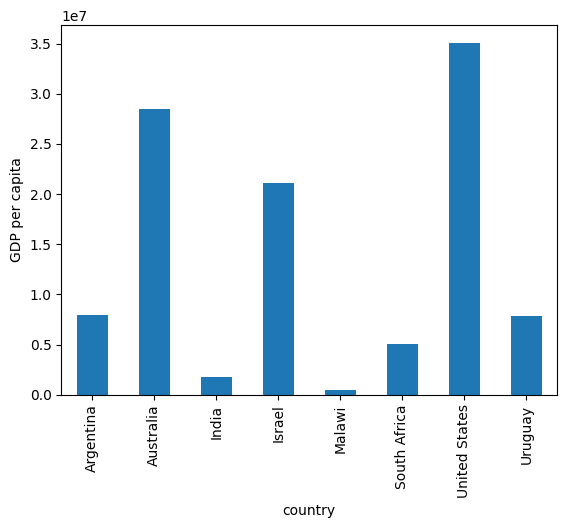

In [50]:
ax = df_filtered['GDP percap'].plot(kind='bar')
ax.set_xlabel('country')
ax.set_ylabel('GDP per capita')

In [52]:
df_filtered = df_filtered.sort_values(by='GDP percap', ascending=False)
df_filtered

,population,total GDP,GDP percap
country,,,
United States,282171.957,9.898700e+06,3.508038e+07
Australia,19053.186,5.418047e+05,2.843643e+07
Israel,6114.570,1.292539e+05,2.113867e+07
Argentina,37335.653,2.950722e+05,7.903229e+06
Uruguay,3219.793,2.525596e+04,7.843971e+06
South Africa,45064.098,2.272424e+05,5.042648e+06
India,1006300.297,1.728144e+06,1.717325e+06
Malawi,11801.505,5.026222e+03,4.258967e+05


Text(0, 0.5, 'GDP per capita')

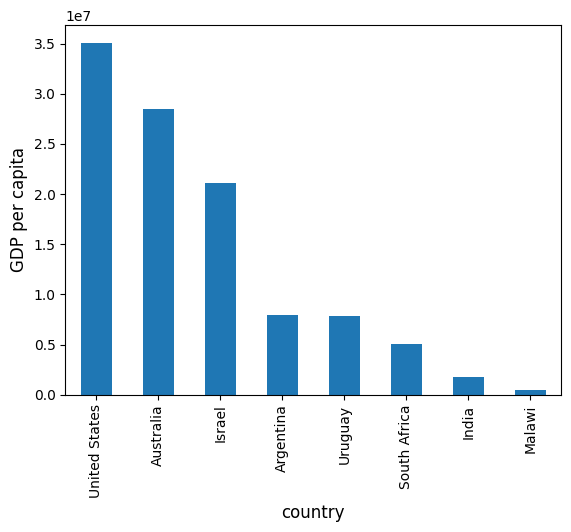

In [53]:
ax = df_filtered['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)